In [1]:
try:
    from pycaret import show_versions
except ModuleNotFoundError:
    !pip install pycaret-ts-alpha
    from pycaret import show_versions

show_versions()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 468 kB 25.5 MB/s 
     |████████████████████████████████| 79.9 MB 110 kB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 120 kB 59.7 MB/s 
     |████████████████████████████████| 1.4 MB 50.2 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 303 kB 64.6 MB/s 
     |████████████████████████████████| 6.5 MB 51.2 MB/s 
     |████████████████████████████████| 3.3 MB 58.1 MB/s 
     |████████████████████████████████| 11.2 MB 56.1 MB/s 
     |████████████████████████████████| 9.8 MB 50.8 MB/s 
     |████████████████████████████████| 2.0 MB 49.9 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 930 kB 76.3 MB/s 
     |████████████████████████████████| 34.5 MB 4.9 kB/s 
  Created wheel for pyod: filename


System:
    python: 3.7.13 (default, Apr 24 2022, 01:04:09)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 21.1.3
   setuptools: 57.4.0
      pycaret: 3.0.0
      sklearn: 1.0.2
       sktime: 0.10.1
  statsmodels: 0.13.2
        numpy: 1.21.6
        scipy: 1.7.3
       pandas: 1.3.5
   matplotlib: 3.2.2
       plotly: 5.5.0
       joblib: 1.0.1
        numba: 0.55.1
       mlflow: Not installed
     lightgbm: 3.3.2
      xgboost: 0.90
     pmdarima: 1.8.5
        tbats: Installed but version unavailable
      prophet: Not installed
      tsfresh: Not installed


In [2]:
!pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
import numpy as np
import pandas as pd
from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [3]:
data = pd.read_excel("/content/DAILY ER.xlsx")
data

,YEAR,MONTH\DAY,COUNT
0,2021,01-Jun,125
1,2021,02-Jun,149
2,2021,03-Jun,121
3,2021,04-Jun,95
4,2021,05-Jun,121
...,...,...,...
352,2022,19-May,166
353,2022,20-May,125
354,2022,21-May,84
355,2022,20-May,125


In [5]:
data = data.drop("YEAR", axis=1, inplace=False)

,MONTH\DAY,COUNT
0,01-Jun,125
1,02-Jun,149
2,03-Jun,121
3,04-Jun,95
4,05-Jun,121
...,...,...
352,19-May,166
353,20-May,125
354,21-May,84
355,20-May,125


In [6]:
data = data.drop("MONTH\DAY", axis=1, inplace=False)

In [7]:
data

,COUNT
0,125
1,149
2,121
3,95
4,121
...,...
352,166
353,125
354,84
355,125


<AxesSubplot:>

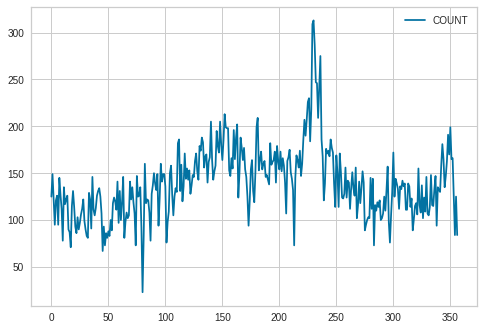

In [8]:
data.plot()

In [9]:
eda = TSForecastingExperiment()

In [23]:
#### Create Time Series Forecasting Experiment ----
exp = TSForecastingExperiment()
global_plot_settings = {"renderer": "colab"}
exp.setup(data=data,target='COUNT',  seasonal_period=30, fh=48, fig_kwargs=global_plot_settings, session_id=42 )

,Description,Value
0,session_id,42
1,Target,COUNT
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(357, 1)"
5,Train data shape,"(309, 1)"
6,Test data shape,"(48, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


In [24]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
theta,Theta Forecaster,30.4622,39.2196,0.2115,0.1950,1.4255,1.4431,-0.7781,0.0467
croston,Croston,30.8542,39.9973,0.2182,0.1996,1.4411,1.4695,-0.8954,0.0200
auto_arima,Auto ARIMA,31.6710,40.5774,0.2169,0.2009,1.4824,1.4933,-0.9637,1.2100
exp_smooth,Exponential Smoothing,35.6334,44.1729,0.2440,0.2203,1.6674,1.6248,-1.6850,0.0400
grand_means,Grand Means Forecaster,34.4135,43.2711,0.2207,0.2267,1.6124,1.5940,-1.0363,0.0233
arima,ARIMA,34.5061,43.3620,0.2207,0.2274,1.6169,1.5975,-1.0462,0.1200
ets,ETS,37.6703,46.1224,0.2579,0.2303,1.7623,1.6960,-2.1174,0.0567
naive,Naive Forecaster,36.6458,45.4743,0.2310,0.2438,1.7180,1.6760,-1.2897,0.0200
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,42.5893,49.7867,0.3239,0.2643,1.9725,1.8135,-3.5454,3.3867
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,43.2455,50.1702,0.3292,0.2697,2.0077,1.8314,-3.0790,0.1167


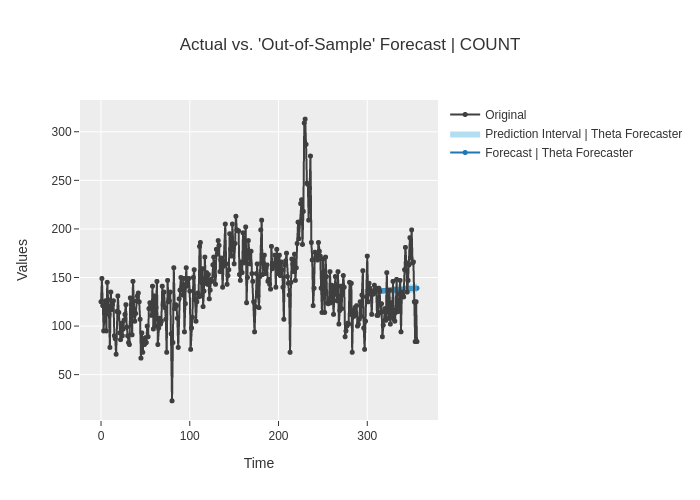

In [25]:
best_baseline = exp.compare_models()
exp.plot_model(best_baseline,fig_kwargs={'renderer': 'png'})

In [26]:
baseline_models = exp.compare_models(n_select=3)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
theta,Theta Forecaster,30.4622,39.2196,0.2115,0.1950,1.4255,1.4431,-0.7781,0.0467
croston,Croston,30.8542,39.9973,0.2182,0.1996,1.4411,1.4695,-0.8954,0.0167
auto_arima,Auto ARIMA,31.6710,40.5774,0.2169,0.2009,1.4824,1.4933,-0.9637,1.2267
exp_smooth,Exponential Smoothing,35.6334,44.1729,0.2440,0.2203,1.6674,1.6248,-1.6850,0.0400
grand_means,Grand Means Forecaster,34.4135,43.2711,0.2207,0.2267,1.6124,1.5940,-1.0363,0.0233
arima,ARIMA,34.5061,43.3620,0.2207,0.2274,1.6169,1.5975,-1.0462,0.0933
ets,ETS,37.6703,46.1224,0.2579,0.2303,1.7623,1.6960,-2.1174,0.0600
naive,Naive Forecaster,36.6458,45.4743,0.2310,0.2438,1.7180,1.6760,-1.2897,0.0200
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,42.5893,49.7867,0.3239,0.2643,1.9725,1.8135,-3.5454,3.3833
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,43.2455,50.1702,0.3292,0.2697,2.0077,1.8314,-3.0790,0.1200


In [27]:
#### Step 3B: Perform hyperparameter tuning on the best baseline models ----
tuned_baseline_models = [exp.tune_model(model) for model in baseline_models]

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,164.0,31.4592,36.8012,0.2245,0.1918,1.4661,1.3443,-1.9165
1,212.0,41.4909,57.3048,0.2156,0.2324,1.9798,2.1535,-0.2770
2,260.0,22.0630,27.6263,0.2105,0.1784,1.0013,0.9822,-0.6976
Mean,NaN,31.6710,40.5774,0.2169,0.2009,1.4824,1.4933,-0.9637
SD,NaN,7.9328,12.4069,0.0058,0.0230,0.3996,0.4896,0.6953


In [28]:
#### Step 3C: Blend the tuned models into 1 composite estimator ----
# If performance of blender is not better than the individual 
# models then choose the best individual model
blender = exp.blend_models(tuned_baseline_models, method='median', choose_better=True)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,164.0,26.6955,32.1754,0.1923,0.1665,1.2441,1.1753,-1.2294
1,212.0,41.5088,57.3324,0.2158,0.2325,1.9806,2.1545,-0.2783
2,260.0,21.8937,27.5286,0.2090,0.1772,0.9936,0.9787,-0.6856
Mean,NaN,30.0327,39.0121,0.2057,0.1921,1.4061,1.4362,-0.7311
SD,NaN,8.3483,13.0925,0.0099,0.0289,0.4189,0.5142,0.3896


In [29]:
# Finalize the model if happy with the results.
# This trains the model on the entire dataset now
final_model = exp.finalize_model(blender)

In [30]:
#### Step 3D: Check predictions ----
exp.plot_model(blender)

In [31]:
exp.predict_model(blender,fh=60)

,y_pred
309,134.2297
310,134.2297
311,134.2297
312,134.2297
313,134.2297
314,134.2297
315,134.2297
316,134.2297
317,134.2297
318,134.2297


In [32]:
exp.plot_model(blender, plot = 'forecast', data_kwargs = {'fh': 60})